In [399]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pycaret.classification import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


def normalize_minmax(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y




# Comparecimento na segunda etapa  - EDA


#### Workbook Structure:

<ul>
<li>Dataset Summary;</li>
<li>Processamento e limpeza dos dados;</li>
<li>Análise; </li>
<li>Modelo;</li>
</ul>

#### Hypothesis

<ol>
<li>Existem comportamentos diferentes por turma;</li>
<li>Notas e tempos refletem uma maior conversão; </li>
<li>Existe comportamento diferente por gênero;</li>
<li>Redes Sociais e Idades diferentes refletem conversões diferentes;</li>    
<li>Variáveis de Motivação e variáveis de Condições afetam de maneira diferente a conversão;</li>    
</ol>

Augusto Otto Molke - augustomolke@gmail.com

# Dataset Summary

In [464]:
df = pd.read_excel('dados_candidatos_2afase.xlsx')

#### A base de dados tem 995 linhas (1 linha = 1 candidato) e 24 colunas

In [465]:
df.shape

(995, 24)

In [466]:
df.dtypes

ID                   int64
Nome                object
Turma                int64
Status              object
Data_nasc           object
Cidade              object
Rede_social         object
Educacao            object
Renda               object
Sustento            object
Trabalho            object
Computador          object
Genero              object
Conhecia_ramo       object
Objetivo            object
Como_conheceu       object
Disponibilidade     object
Indicacao             bool
Nota_QI            float64
Tempo_Inscr_QI      object
Tempo_QI            object
Nota_Mat           float64
Tempo_Inscr_Mat     object
Tempo_Mat           object
dtype: object

## Existem canditados sem informações sobre as provas e renda. Vamos descartar esses dados.

In [467]:
print(f"Quantidade de dados nulos em cada coluna: \n{df.isnull().sum()}")

Quantidade de dados nulos em cada coluna: 
ID                   0
Nome                 0
Turma                0
Status               0
Data_nasc            0
Cidade               0
Rede_social        349
Educacao             0
Renda               31
Sustento             0
Trabalho             0
Computador           0
Genero               0
Conhecia_ramo      350
Objetivo           349
Como_conheceu      349
Disponibilidade    349
Indicacao            0
Nota_QI             17
Tempo_Inscr_QI      17
Tempo_QI            17
Nota_Mat            18
Tempo_Inscr_Mat     18
Tempo_Mat           18
dtype: int64


In [468]:
df.dropna(inplace=True, subset=['Nota_QI','Nota_Mat','Renda'])
df.head()

,ID,Nome,Turma,Status,Data_nasc,Cidade,Rede_social,Educacao,Renda,Sustento,...,Objetivo,Como_conheceu,Disponibilidade,Indicacao,Nota_QI,Tempo_Inscr_QI,Tempo_QI,Nota_Mat,Tempo_Inscr_Mat,Tempo_Mat
0,9,Christian Henrique Zolin,1,compareceu,1995-01-10 00:00:00,São paulo,NaN,Ensino médio completo,R$ 3.000 até R$ 4.000,Tenho um emprego,...,NaN,NaN,NaN,False,105.0,19 days 18:09:40,00:25:01,2.0,19 days 18:16:55,00:06:51
1,30,ELLAYNE CAROLINE DANTAS LOPES ARAUJO,2,compareceu,1994-02-02 00:00:00,São Paulo,NaN,Ensino superior completo,R$ 1.000 até R$ 2.000,Tenho um emprego,...,NaN,NaN,NaN,False,97.0,3 days 03:36:14,00:24:32,3.0,3 days 03:45:17,00:08:58
3,59,Gabriel Alves da Silva,1,compareceu,2001-04-02 00:00:00,São Paulo,NaN,Ensino médio completo,R$ 1.000 até R$ 2.000,Tenho um emprego,...,NaN,NaN,NaN,False,95.0,8 days 00:41:44,00:25:00,4.0,4 days 18:13:15,00:12:57
5,99,Vinicius Dias Santos,1,compareceu,1993-01-27 00:00:00,Santo André,NaN,Ensino superior incompleto,R$ 2.000 até R$ 3.000,Tenho um emprego,...,NaN,NaN,NaN,False,112.0,4 days 01:04:51,00:25:01,4.0,4 days 01:11:35,00:06:27
6,102,Bernardo Magalhães Braga de Souza,1,compareceu,1995-09-23 00:00:00,Niteroi,NaN,Ensino médio completo,R$ 2.000 até R$ 3.000,Não sei,...,NaN,NaN,NaN,False,112.0,00:26:48,00:24:42,4.0,00:31:06,00:04:03


In [469]:
df.shape

(945, 24)

## Alguns candidatos fizeram a inscrição 2x

In [470]:
df.pivot_table(index=['Nome'], aggfunc='size').sort_values(ascending=False)

Nome
Josiane Rocha de Oliveira            3
João Vitor oliveira ramos            2
Wilson Camilo da Silva               2
Alexandre Santos Adabo               2
Alexia Bruna Justino Silva           2
Jhony da Silva Melo                  2
Mateus Novais Simões                 2
Raphaella Amorim de Souza            2
Matheus Antônio Melo Vidal           2
Lucas correia da silva               2
Thiago Cruz Alves                    2
Amanda Kelly Menezes Fiais           2
Matheus Leonardi Afonso              2
Leonardo Meneghetti Sani             2
Davi Barbosa Mendes                  2
Anderson Oliveira de Freitas         2
DANILO VINICIUS DE OLIVEIRA LIMA     2
Jacqueline Carvalho Gomes            2
Severino Armando                     2
Luigi Miranda Sampaio                2
Caick Fernandes Oliveira Marques     2
Bruno Toledo Costa Boscaini          2
Paulo Roberto Sedlmayer Filho        2
Paulo Roberto Da Silva Junior        2
MATHEUS LEANDRO SILVESTRE            2
Thamires Barbosa dos

In [471]:
df.drop_duplicates("Nome", inplace=True)

In [472]:
df.shape

(918, 24)

### Descartamos 50 linhas de dados

## Transformações em algumas colunas

In [406]:
t2 = datetime(1900,1,1)
df['Idade'] = datetime.now().year - df['Data_nasc'].astype(str).str[0:4].astype(int)
df['Idade'] = np.where(df['Idade']<=17, 17,df['Idade'] )
df['Idade'] = np.where(df['Idade']>=30, 30, df['Idade'] )
df['Tempo_Inscr_Mat']=  df['Tempo_Inscr_Mat'].astype(str).apply(lambda x: \
                                                      int(x.split(' ')[0])*24+(datetime.strptime(x.split(' ')[2], '%H:%M:%S')-t2).total_seconds() / 3600.0 \
                                                      if ('day' in x) \
                                                      else (datetime.strptime(x, '%H:%M:%S')-t2).total_seconds() / 3600.0) 

df['Tempo_Inscr_QI']=  df['Tempo_Inscr_QI'].astype(str).apply(lambda x: \
                                                      int(x.split(' ')[0])*24+(datetime.strptime(x.split(' ')[2], '%H:%M:%S')-t2).total_seconds() / 3600.0 \
                                                      if ('day' in x) \
                                                      else (datetime.strptime(x, '%H:%M:%S')-t2).total_seconds() / 3600.0) 

df['Tempo_Mat']=  df['Tempo_Mat'].astype(str).apply(lambda x: \
                                                      int(x.split(' ')[0])*24+(datetime.strptime(x.split(' ')[2], '%H:%M:%S')-t2).total_seconds() / 3600.0 \
                                                      if ('day' in x) \
                                                      else (datetime.strptime(x, '%H:%M:%S')-t2).total_seconds() / 3600.0) 


df['Tempo_QI']=  df['Tempo_QI'].astype(str).apply(lambda x: \
                                                      int(x.split(' ')[0])*24+(datetime.strptime(x.split(' ')[2], '%H:%M:%S')-t2).total_seconds() / 3600.0 \
                                                      if ('day' in x) \
                                                      else (datetime.strptime(x, '%H:%M:%S')-t2).total_seconds() / 3600.0) 

df['Rede_social'] = df['Rede_social'].astype(str).apply(lambda x:'Linkedin' if ('linkedin' in x) else ('Facebook' if ('facebook' in x) else ('Insta' if ('instagram' in x) or ('@' in x)  else ( 'NAN' if (x=='NaN') else "Outras") ))) 
df['Indicacao'] = df['Indicacao'].astype(str).apply(lambda x:0 if (x=='False') else 1)
df['Genero'] = df['Genero'].astype(str).apply(lambda x:0 if (x=='H') else 1) 
df['Status'] = df['Status'].astype(str).apply(lambda x:1 if (x=='compareceu') else 0)
df['Tempo_Total'] = df['Tempo_QI']+df['Tempo_Mat']


#### Transformações:

<ol>
<li>Data de nascimento em idade</li>
<li>Tempos em total de hora (numérico)</li>
<li>Redes sociais agrupadas em Linkedin, Facebook, Instagram, Vazio e outras </li>
<li>Indicação em 0 ou 1 </li>    
<li>Genero em 0 ou 1</li>  
<li>Status em 0 ou 1</li>
<li>Criação de 'Tempo Total' = Tempo_Mat + Tempo_QI</li>
</ol>

In [407]:
df.describe()

,ID,Turma,Status,Genero,Indicacao,Nota_QI,Tempo_Inscr_QI,Tempo_QI,Nota_Mat,Tempo_Inscr_Mat,Tempo_Mat,Idade,Tempo_Total
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,1651.223280,2.667725,0.445503,0.316402,0.094180,85.220106,62.735740,0.759738,5.045503,64.665978,0.789792,25.097354,1.549530
std,754.757486,0.503868,0.497284,0.465318,0.292233,36.358068,123.556975,10.805384,2.456624,122.641743,15.747547,3.610402,19.075339
min,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.019167,0.014444,0.000000,0.016389,0.003333,17.000000,0.019444
25%,1138.000000,2.000000,0.000000,0.000000,0.000000,92.000000,0.437222,0.228889,3.000000,0.590278,0.095278,22.000000,0.359444
50%,1766.000000,3.000000,0.000000,0.000000,0.000000,97.000000,10.685278,0.348611,5.000000,13.367222,0.139444,25.000000,0.485833
75%,2258.000000,3.000000,1.000000,1.000000,0.000000,102.000000,75.216944,0.416667,7.000000,80.546944,0.190278,28.000000,0.575278
max,2848.000000,3.000000,1.000000,1.000000,1.000000,138.000000,1391.209167,317.139722,10.000000,1391.385278,473.904167,30.000000,473.938333


## Outliers

Utilizarei Boxplot para remover outliers como idade = 825 anos

In [408]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = 1.5*(Q3 - Q1)

# Iterate over the sequence of column names
for column in df:
    if df[column].dtype!='object':
        print(column,":", df[((df[column] < (Q1[column]-1.5 * IQR[column])) |(df[column] > (Q3[column] + 1.5 * IQR[column])))].shape[0])
        #print(column,":", df[((df[column] < (Q1[column]-1.5 * IQR[column])) |(df[column] > (Q3[column] + 1.5 * IQR[column])))].shape[0])

ID : 0
Turma : 0
Status : 0
Genero : 0
Indicacao : 89
Nota_QI : 157
Tempo_Inscr_QI : 61
Tempo_QI : 3
Nota_Mat : 0
Tempo_Inscr_Mat : 58
Tempo_Mat : 13
Idade : 0
Tempo_Total : 11


In [409]:
colunas_out=['Idade','Tempo_Mat','Tempo_Inscr_Mat','Tempo_QI','Tempo_Inscr_QI']
df = df[~((df[colunas_out] < (Q1[colunas_out]-1.5 * IQR[colunas_out])) |(df[colunas_out] > (Q3[colunas_out] + 1.5 * IQR[colunas_out]))).any(axis=1)]
df.shape

(868, 26)

#### Agora temos 857 dados na base

## Padronização de textos

#### Cidades

In [410]:
df['Cidade'] = df['Cidade'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

df['Cidade']=  df['Cidade'].astype(str).apply(lambda x: x.upper() ) 

grouped = df[['ID','Cidade','Status']].groupby('Cidade', sort=True).agg({'ID': 'count','Status':'sum'})
grouped.sort_index(ascending=False)

#grouped.sort_values(by='ID').tail(10).plot.barh()

grouped = df[['Cidade','Status','ID']].groupby('Cidade', sort=True).agg({'Status':'mean','ID':'count'})
grouped[grouped['ID']>5].sort_values(by='Status')

,Status,ID
Cidade,,
MAUA,0.133333,15
OSASCO,0.227273,22
ITAQUAQUECETUBA,0.272727,11
CARAPICUIBA,0.318182,22
BARUERI,0.333333,15
TABOAO DA SERRA,0.428571,7
SAO PAULO,0.442068,561
GUARULHOS,0.444444,27
ITAPEVI,0.444444,9


In [411]:
df['Cidade']=  df['Cidade'].astype(str).apply(lambda x: 'SAO PAULO' \
                                                      if ('PAULO' in x) or (('SP' in x)) \
                                                      else ('Grupo 2' if x in (['MAUA', 'ITAQUAQUECETUBA','OSASCO','BARUERI','CARAPICUIBA','TABOAO DA SERRA'])
                                                            else 'Grupo 1' if x in (['COTIA','JANDIRA','SAO CAETANO DO SUL','FRANCO DA ROCHA','SAO BERNARDO DO CAMPO','DANTO ANDRE']) else 'Menos que 5 candidatos')
                                             ) 

In [412]:
grouped = df[['Cidade','Status','ID']].groupby('Cidade', sort=True).agg({'Status':'mean','ID':'count'})
grouped[grouped['ID']>5].sort_values(by='Status')

,Status,ID
Cidade,,
Grupo 2,0.271739,92
SAO PAULO,0.440823,583
Menos que 5 candidatos,0.484277,159
Grupo 1,0.676471,34


## Educação

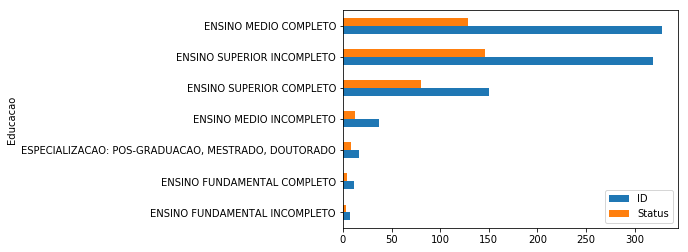

In [413]:
df['Educacao'] = df['Educacao'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

df['Educacao']=  df['Educacao'].astype(str).apply(lambda x: x.upper() ) 

grouped = df[['ID','Educacao','Status']].groupby('Educacao', sort=True).agg({'ID': 'count','Status':'sum'})
grouped.sort_values(by='ID').tail(10).plot.barh()

df['Educacao'] = df['Educacao'].str.split().str[-2] + " " + df['Educacao'].str.split().str[-1]

## Renda: Descartarei os erros

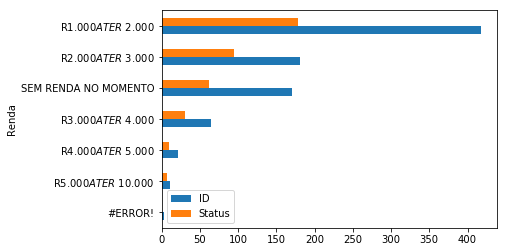

In [414]:
df['Renda'] = df['Renda'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

df['Renda']=  df['Renda'].astype(str).apply(lambda x: x.upper() ) 

grouped = df[['ID','Renda','Status']].groupby('Renda', sort=True).agg({'ID': 'count','Status':'sum'})
grouped.sort_index(ascending=True)
grouped.sort_values(by='ID').tail(10).plot.barh()

In [415]:
df=df[df['Renda']!='#ERROR!']

## Sustento

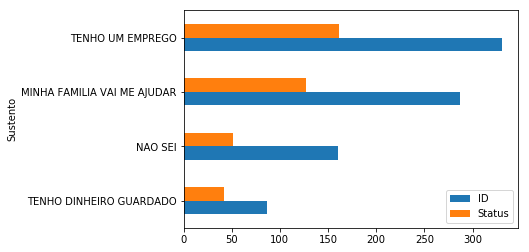

In [416]:
df['Sustento'] = df['Sustento'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

df['Sustento']=  df['Sustento'].astype(str).apply(lambda x: x.upper() ) 


grouped = df[['ID','Sustento','Status']].groupby('Sustento', sort=True).agg({'ID': 'count','Status':'sum'})
grouped.sort_index(ascending=True)
grouped.sort_values(by='ID').tail(10).plot.barh()

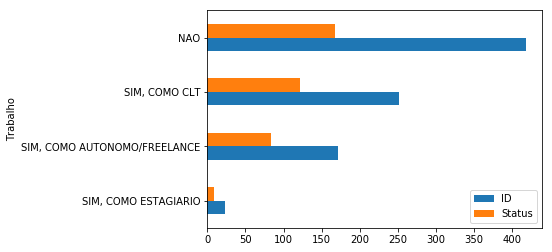

In [417]:
df['Trabalho'] = df['Trabalho'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

df['Trabalho']=  df['Trabalho'].astype(str).apply(lambda x: x.upper() ) 

grouped = df[['ID','Trabalho','Status']].groupby('Trabalho', sort=True).agg({'ID': 'count','Status':'sum'})
grouped.sort_values(by='ID').tail(10).plot.barh()

df['Trabalho'] = df['Trabalho'].str.split().str[-1]

## Computador: Agrupar em 'SIM' ou 'NÃO'

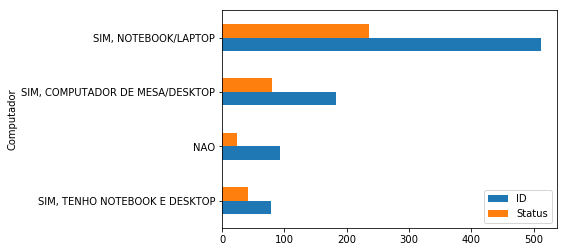

In [418]:
df['Computador'] = df['Computador'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

df['Computador']=  df['Computador'].astype(str).apply(lambda x: x.upper() ) 

grouped = df[['ID','Computador','Status']].groupby('Computador', sort=True).agg({'ID': 'count','Status':'sum'})
grouped.sort_values(by='ID').tail(10).plot.barh()

In [419]:
df['Computador']=  df['Computador'].astype(str).apply(lambda x: 'NAO' \
                                                      if ('NAO' in x) \
                                                      else 'SIM') 

## Objetivo 

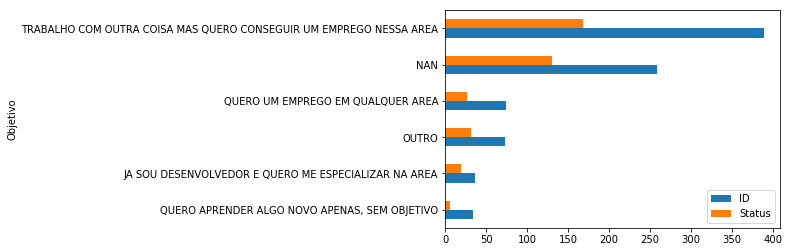

In [420]:
df['Objetivo'] = df['Objetivo'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

df['Objetivo']=  df['Objetivo'].astype(str).apply(lambda x: x.upper() ) 

grouped = df[['ID','Objetivo','Status']].groupby('Objetivo', sort=True).agg({'ID': 'count','Status':'sum'})
grouped.sort_values(by='ID').tail(10).plot.barh()


df['Objetivo'] = df['Objetivo'].str.split().str.get(0) +" " +  df['Objetivo'].str.split().str.get(1) + " " + df['Objetivo'].str.split().str.get(2)

## Como conheceu

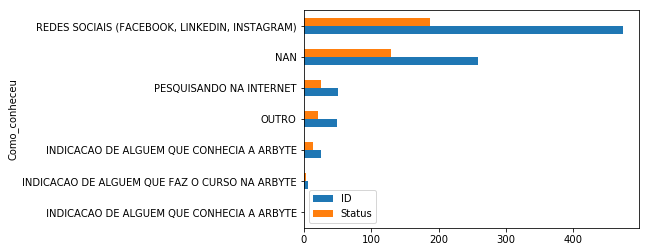

In [421]:
df['Como_conheceu'] = df['Como_conheceu'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

df['Como_conheceu']=  df['Como_conheceu'].astype(str).apply(lambda x: x.upper() ) 

grouped = df[['ID','Como_conheceu','Status']].groupby('Como_conheceu', sort=True).agg({'ID': 'count','Status':'sum'})
grouped.sort_values(by='ID').tail(10).plot.barh()

df['Como_conheceu']=  np.where(df['Como_conheceu'].str.contains('INDICACAO'), df['Como_conheceu'].str.split().str.get(0) +" " +  df['Como_conheceu'].str.split().str.get(4) , df['Como_conheceu'].str.split().str.get(0))

## Disponibilidade: transformar em 3 campos binários

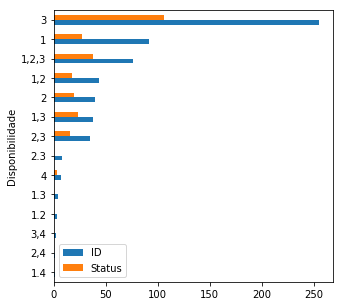

In [422]:
df['Disp_Manha']=  df['Disponibilidade'].astype(str).apply(lambda x: 1\
                                                      if ('1' in x) & ('4' not in x) \
                                                      else 0) 
df['Disp_Tarde']=  df['Disponibilidade'].astype(str).apply(lambda x: 1\
                                                      if ('2' in x) & ('4' not in x) \
                                                      else 0)
df['Disp_Noite']=  df['Disponibilidade'].astype(str).apply(lambda x: 1\
                                                      if ('3' in x) & ('4' not in x) \
                                                      else 0)

df['Disp_Total']=  df['Disp_Manha']+df['Disp_Tarde']+df['Disp_Noite']
plt.rcParams["figure.figsize"] = (5,5)
grouped = df[['ID','Disponibilidade','Status']].groupby('Disponibilidade', sort=True).agg({'ID': 'count','Status':'sum'})
grouped.sort_values(by='ID').plot.barh()

## Conhecia_ramo: 

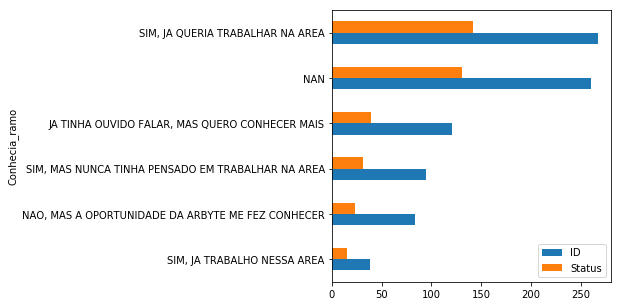

In [423]:
df['Conhecia_ramo'] = df['Conhecia_ramo'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

df['Conhecia_ramo']=  df['Conhecia_ramo'].astype(str).apply(lambda x: x.upper() ) 

grouped = df[['ID','Conhecia_ramo','Status']].groupby('Conhecia_ramo', sort=True).agg({'ID': 'count','Status':'sum'})
grouped.sort_values(by='ID').tail(10).plot.barh()

df['Conhecia_ramo'] = df['Conhecia_ramo'].str.split().str.get(0) +" " +  df['Conhecia_ramo'].str.split().str.get(1) + " " + df['Conhecia_ramo'].str.split().str.get(2)

## Nota de Matemática pode ser tratada como discreta

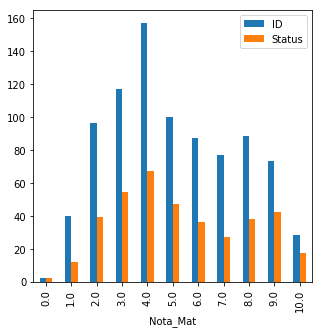

In [424]:
grouped = df[['ID','Nota_Mat','Status']].groupby('Nota_Mat', sort=True).agg({'ID': 'count','Status':'sum'})
grouped.plot.bar()
#sns.distplot(df['Nota_Mat'])

## Transoformação Logarítmica dos tempos para tratar a distribuição muito pouco simétrica

In [425]:
df['Tempo_Inscr_QI'] = np.log(df['Tempo_Inscr_QI']).round(2)

df['Tempo_Inscr_Mat'] = np.log(df['Tempo_Inscr_Mat']).round(2)

#df['Tempo_QI'] = np.log(df['Tempo_QI'])
#df['Tempo_Mat'] = np.log(df['Tempo_Mat'])

df['Nota_QI'] = normalize_minmax(df['Nota_QI']).round(2)

turma2= df[df['Turma']==2]
turma3= df[df['Turma']==3]

turma2['Nota_Mat'] = normalize_minmax(turma2['Nota_Mat']).round(2)

turma3['Nota_Mat'] = normalize_minmax(turma3['Nota_Mat']).round(2)


df=turma2.append(turma3)

In [426]:
df.describe()

,ID,Turma,Status,Genero,Indicacao,Nota_QI,Tempo_Inscr_QI,Tempo_QI,Nota_Mat,Tempo_Inscr_Mat,Tempo_Mat,Idade,Tempo_Total,Disp_Manha,Disp_Tarde,Disp_Noite,Disp_Total
count,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000
mean,1725.598120,2.715629,0.431257,0.320799,0.089307,0.616157,1.579647,0.312571,0.479295,1.736616,0.143683,25.112808,0.456254,0.301998,0.242068,0.488837,1.032902
std,712.921823,0.451380,0.495543,0.467058,0.285354,0.265010,2.508409,0.112139,0.258767,2.453311,0.065854,3.623318,0.152423,0.459394,0.428587,0.500169,0.901684
min,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-3.950000,0.014444,0.000000,-4.110000,0.003333,17.000000,0.019444,0.000000,0.000000,0.000000,0.000000
25%,1265.500000,2.000000,0.000000,0.000000,0.000000,0.670000,-0.850000,0.226389,0.300000,-0.590000,0.095139,22.000000,0.359167,0.000000,0.000000,0.000000,0.000000
50%,1808.000000,3.000000,0.000000,0.000000,0.000000,0.700000,1.760000,0.348611,0.440000,2.110000,0.140278,26.000000,0.483611,0.000000,0.000000,0.000000,1.000000
75%,2299.500000,3.000000,1.000000,1.000000,0.000000,0.740000,3.960000,0.416667,0.670000,4.095000,0.191111,28.000000,0.572778,1.000000,0.000000,1.000000,1.000000
max,2848.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5.490000,0.670000,1.000000,5.490000,0.345278,30.000000,0.866667,1.000000,1.000000,1.000000,3.000000


## Verificando se a base de dados está equilibrada

In [427]:
df.groupby('Status').count()

,ID,Nome,Turma,Data_nasc,Cidade,Rede_social,Educacao,Renda,Sustento,Trabalho,...,Tempo_QI,Nota_Mat,Tempo_Inscr_Mat,Tempo_Mat,Idade,Tempo_Total,Disp_Manha,Disp_Tarde,Disp_Noite,Disp_Total
Status,,,,,,,,,,,,,,,,,,,,,
0,484,484,484,484,484,484,484,484,484,484,...,484,484,484,484,484,484,484,484,484,484
1,367,367,367,367,367,367,367,367,367,367,...,367,367,367,367,367,367,367,367,367,367


## Exploração 

[Text(0, 0.5, 'Status'), Text(0.5, 0, 'Renda')]

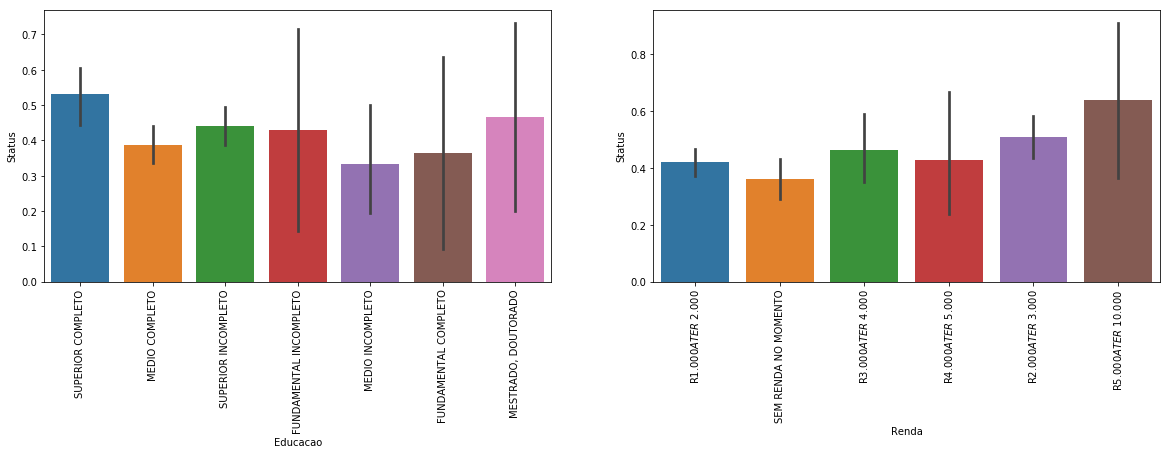

In [428]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20, 5)
sns.barplot(x='Educacao',y='Status',data=df,ax=axes[0]).set_xticklabels(axes[0].get_xticklabels(), rotation=90)
sns.barplot(x='Renda',y='Status',data=df,ax=axes[1]).set_xticklabels(axes[1].get_xticklabels(), rotation=90)

axes[0].set(xlabel='Educacao', ylabel='Status')
axes[1].set(xlabel='Renda', ylabel='Status')

[Text(0, 0.5, 'Status'), Text(0.5, 0, 'Trabalho')]

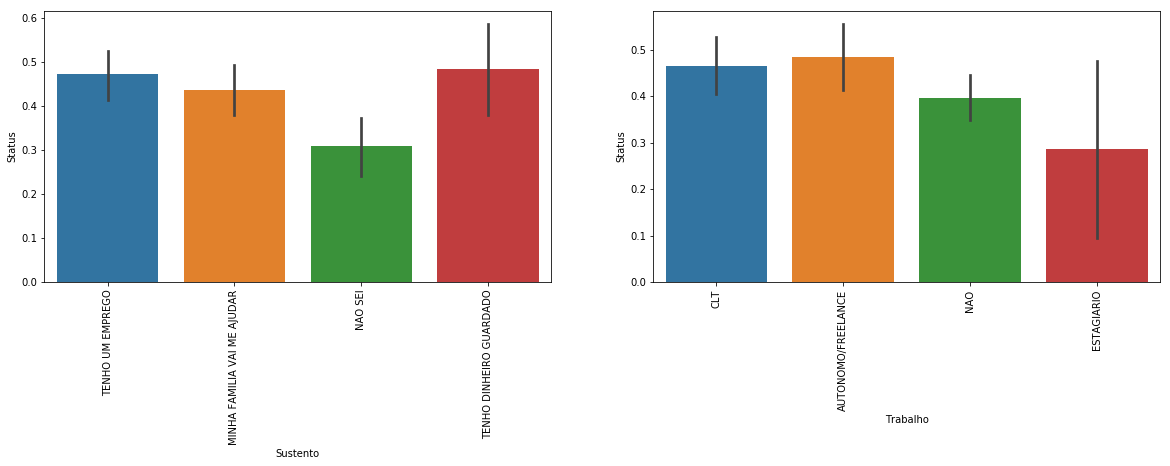

In [429]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20, 5)
sns.barplot(x='Sustento',y='Status',data=df,ax=axes[0]).set_xticklabels(axes[0].get_xticklabels(), rotation=90)
sns.barplot(x='Trabalho',y='Status',data=df,ax=axes[1]).set_xticklabels(axes[1].get_xticklabels(), rotation=90)

axes[0].set(xlabel='Sustento', ylabel='Status')
axes[1].set(xlabel='Trabalho', ylabel='Status')

[Text(0, 0.5, 'Status'), Text(0.5, 0, 'Objetivo')]

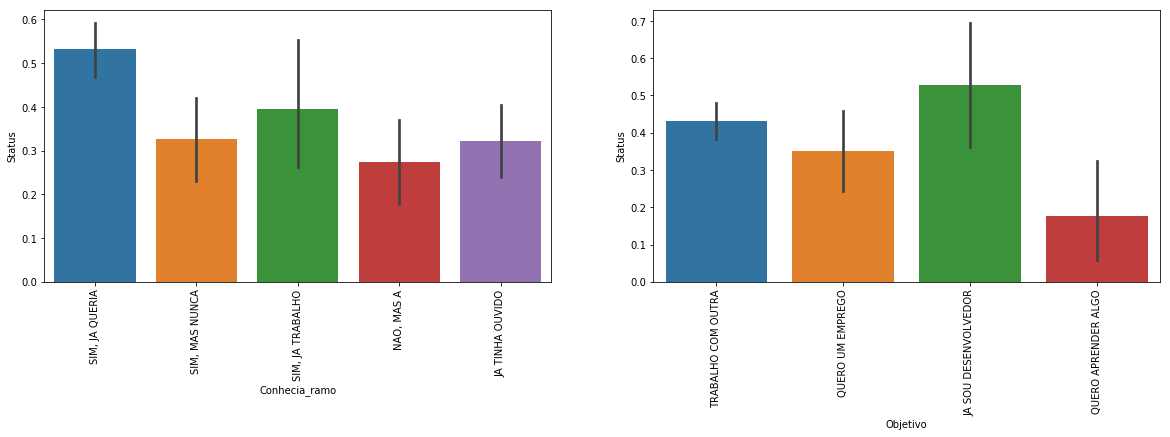

In [430]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20, 5)
sns.barplot(x='Conhecia_ramo',y='Status',data=df,ax=axes[0]).set_xticklabels(axes[0].get_xticklabels(), rotation=90)
sns.barplot(x='Objetivo',y='Status',data=df,ax=axes[1]).set_xticklabels(axes[1].get_xticklabels(), rotation=90)

axes[0].set(xlabel='Conhecia_ramo', ylabel='Status')
axes[1].set(xlabel='Objetivo', ylabel='Status')

[Text(0, 0.5, 'Status'), Text(0.5, 0, 'Idade')]

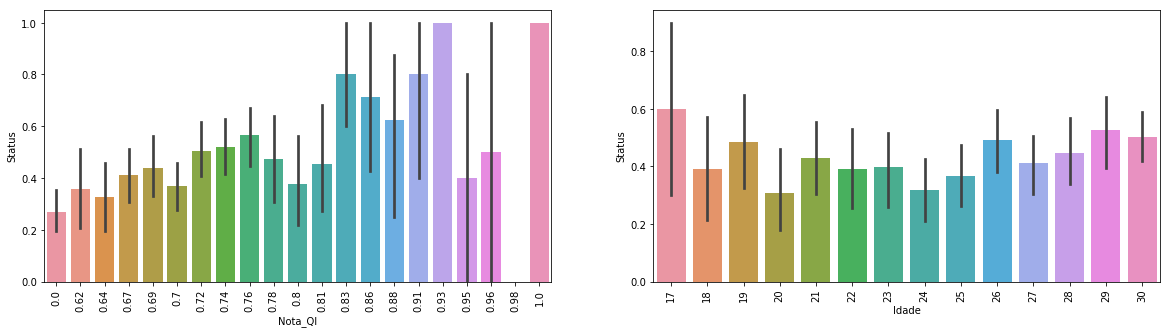

In [431]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20, 5)
sns.barplot(x='Nota_QI',y='Status',data=df,ax=axes[0]).set_xticklabels(axes[0].get_xticklabels(), rotation=90)
sns.barplot(x='Idade',y='Status',data=df,ax=axes[1]).set_xticklabels(axes[1].get_xticklabels(), rotation=90)

axes[0].set(xlabel='Nota_QI', ylabel='Status')
axes[1].set(xlabel='Idade', ylabel='Status')

[Text(0, 0.5, 'Status'), Text(0.5, 0, 'Rede_social')]

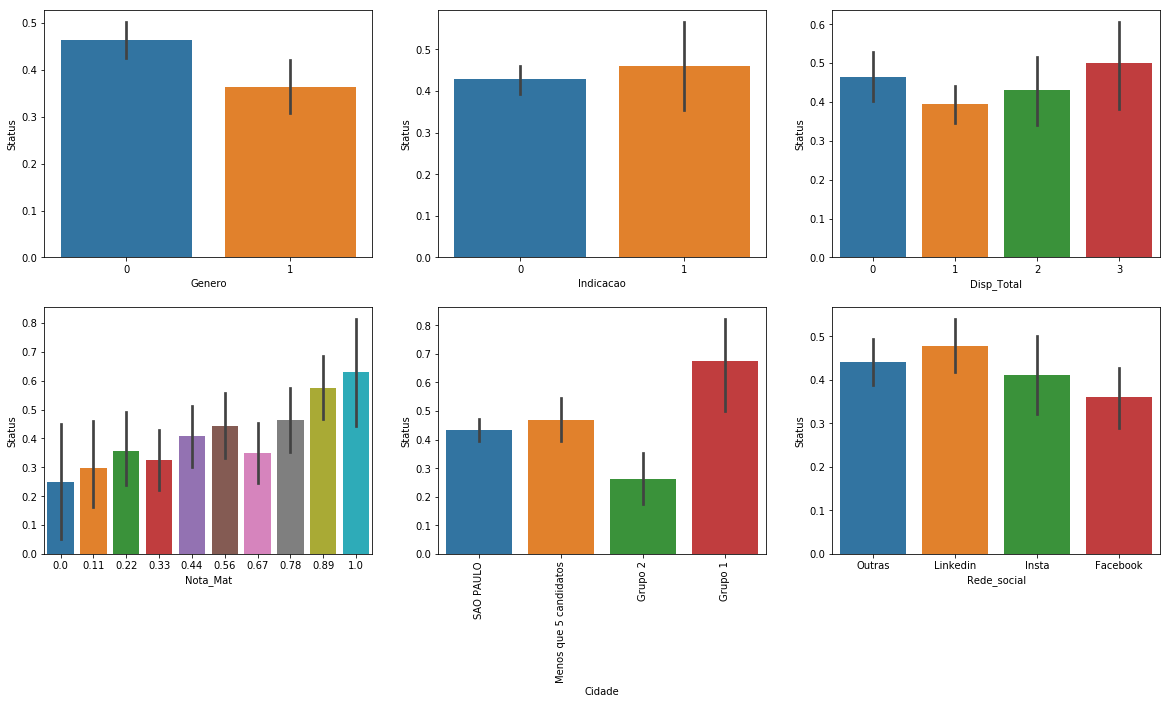

In [432]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 10)
sns.barplot(x='Genero',y='Status',data=df,ax=axes[0][0])
sns.barplot(x='Indicacao',y='Status',data=df,ax=axes[0][1])
sns.barplot(x='Disp_Total',y='Status',data=df,ax=axes[0][2])
sns.barplot(x='Nota_Mat',y='Status',data=df[df['Turma']==3],ax=axes[1][0])
sns.barplot(x='Cidade',y='Status',data=df,ax=axes[1][1]).set_xticklabels(axes[1][1].get_xticklabels(), rotation=90)
sns.barplot(x='Rede_social',y='Status',data=df,ax=axes[1][2])


axes[0][0].set(xlabel='Genero', ylabel='Status')
axes[0][1].set(xlabel='Indicacao', ylabel='Status')
axes[0][2].set(xlabel='Disp_Total', ylabel='Status')
axes[1][0].set(xlabel='Nota_Mat', ylabel='Status')
axes[1][1].set(xlabel='Cidade', ylabel='Status')
axes[1][2].set(xlabel='Rede_social', ylabel='Status')

[Text(0, 0.5, 'Status'), Text(0.5, 0, 'Idade')]

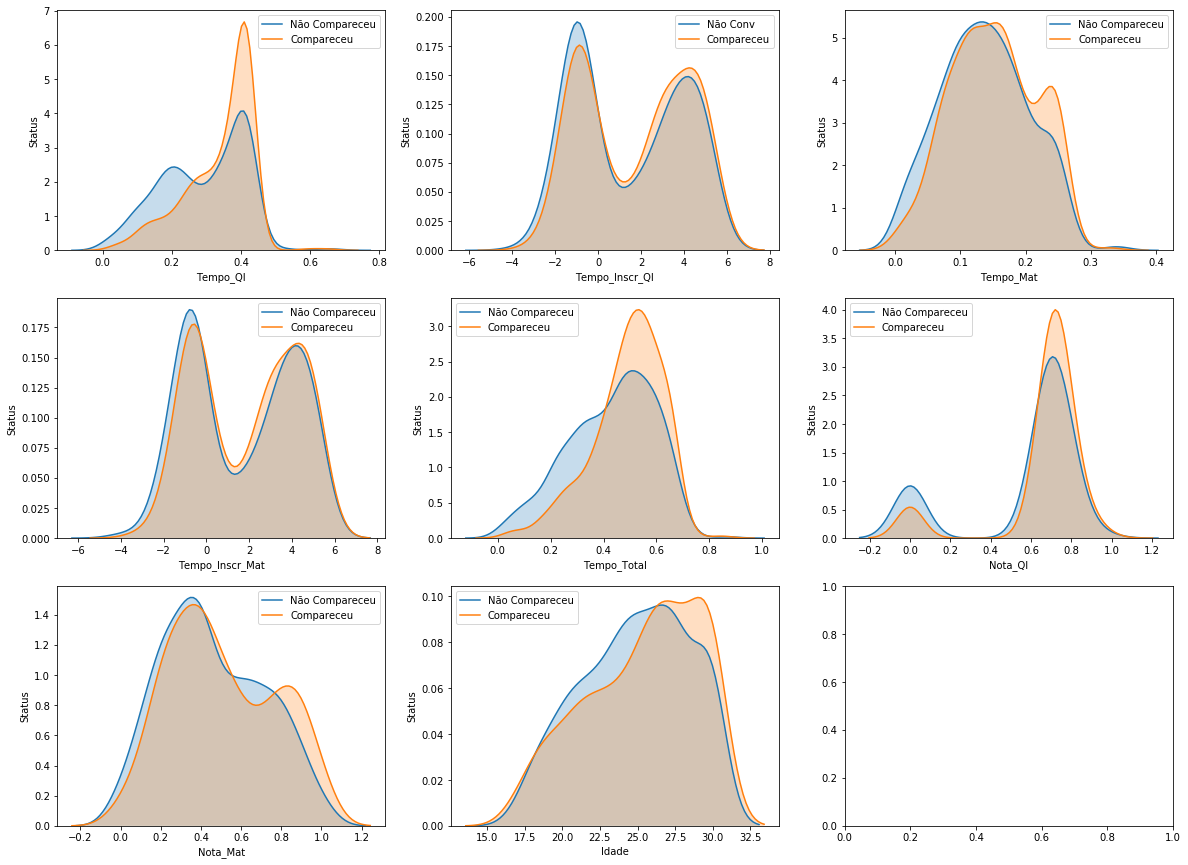

In [433]:
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(20, 15)
sns.kdeplot(df['Tempo_QI'].loc[df.Status == 0], shade=True,label='Não Compareceu',ax=axes[0][0])
sns.kdeplot(df['Tempo_QI'].loc[df.Status == 1], shade=True, label='Compareceu',ax=axes[0][0])
sns.kdeplot(df['Tempo_Inscr_QI'].loc[df.Status == 0], shade=True,label='Não Conv',ax=axes[0][1])
sns.kdeplot(df['Tempo_Inscr_QI'].loc[df.Status == 1], shade=True, label='Compareceu',ax=axes[0][1])
sns.kdeplot(df['Tempo_Mat'].loc[df.Status == 0], shade=True,label='Não Compareceu',ax=axes[0][2])
sns.kdeplot(df['Tempo_Mat'].loc[df.Status == 1], shade=True, label='Compareceu',ax=axes[0][2])
sns.kdeplot(df['Tempo_Inscr_Mat'].loc[df.Status == 0], shade=True,label='Não Compareceu',ax=axes[1][0])
sns.kdeplot(df['Tempo_Inscr_Mat'].loc[df.Status == 1], shade=True, label='Compareceu',ax=axes[1][0])
sns.kdeplot(df['Tempo_Total'].loc[df.Status == 0], shade=True,label='Não Compareceu',ax=axes[1][1])
sns.kdeplot(df['Tempo_Total'].loc[df.Status == 1], shade=True, label='Compareceu',ax=axes[1][1])
sns.kdeplot(df['Nota_QI'].loc[df.Status == 0], shade=True,label='Não Compareceu',ax=axes[1][2])
sns.kdeplot(df['Nota_QI'].loc[df.Status == 1], shade=True, label='Compareceu',ax=axes[1][2])
sns.kdeplot(df['Nota_Mat'].loc[df.Status == 0], shade=True,label='Não Compareceu',ax=axes[2][0])
sns.kdeplot(df['Nota_Mat'].loc[df.Status == 1], shade=True, label='Compareceu',ax=axes[2][0])
sns.kdeplot(df['Idade'].loc[df.Status == 0], shade=True,label='Não Compareceu',ax=axes[2][1])
sns.kdeplot(df['Idade'].loc[df.Status == 1], shade=True, label='Compareceu',ax=axes[2][1])

axes[0][0].set(xlabel='Tempo_QI', ylabel='Status')
axes[0][1].set(xlabel='Tempo_Inscr_QI', ylabel='Status')
axes[0][2].set(xlabel='Tempo_Mat', ylabel='Status')
axes[1][0].set(xlabel='Tempo_Inscr_Mat', ylabel='Status')
axes[1][1].set(xlabel='Tempo_Total', ylabel='Status')
axes[1][2].set(xlabel='Nota_QI', ylabel='Status')
axes[2][0].set(xlabel='Nota_Mat', ylabel='Status')
axes[2][1].set(xlabel='Idade', ylabel='Status')


Seems that the most significant features for the response rate are: Income, AOV, Total_income_familymember and MntWines.

Lets investigate if there is any insightful information if we look for the amount spent in products as %: 

## Diferenças por Turma

[Text(0, 0, '0'), Text(0, 0, '1')]

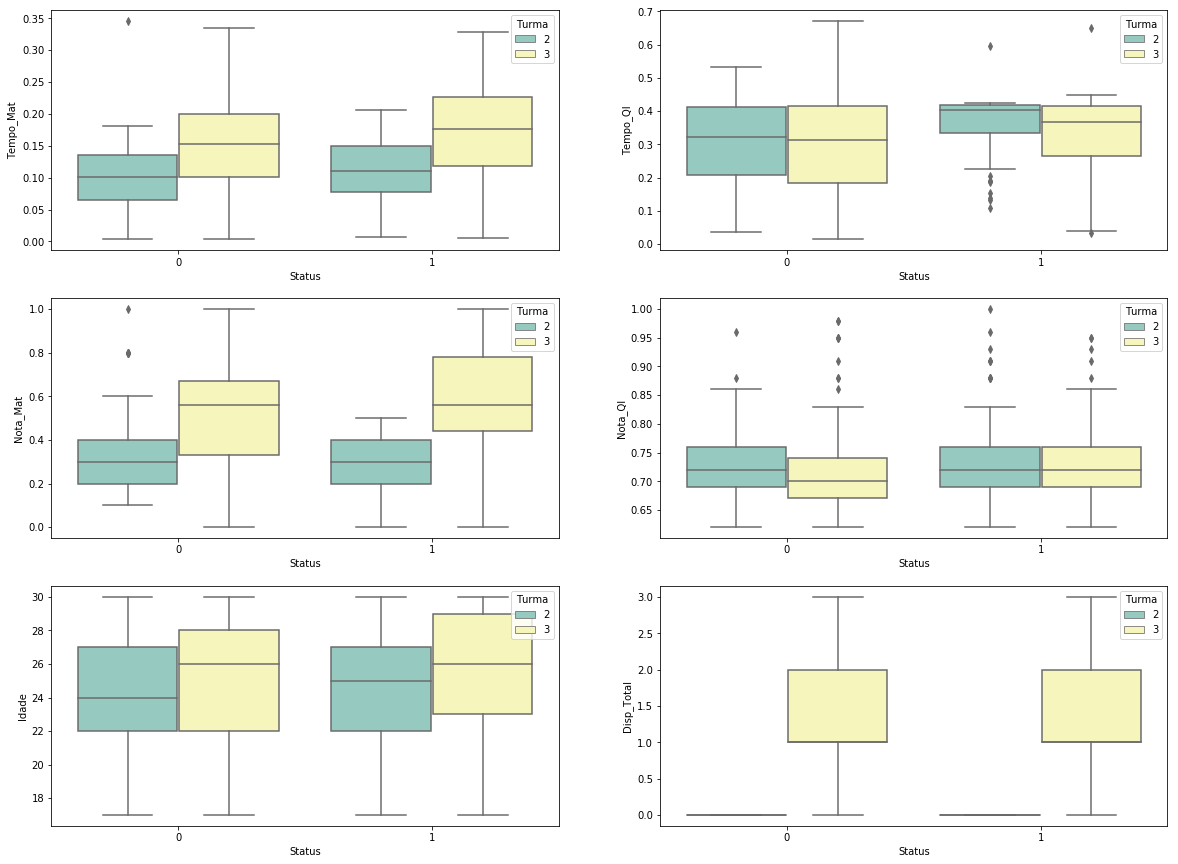

In [434]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 15)
sns.boxplot(x="Status", y="Tempo_Mat", hue="Turma",
                 data=df, palette="Set3", ax=axes[0][0]).set_xticklabels(axes[0][0].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Tempo_QI", hue="Turma",
                 data=df, palette="Set3", ax=axes[0][1]).set_xticklabels(axes[0][1].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Nota_Mat", hue="Turma",
                 data=df, palette="Set3", ax=axes[1][0]).set_xticklabels(axes[1][0].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Nota_QI", hue="Turma",
                 data=df[df['Nota_QI']!=0], palette="Set3", ax=axes[1][1]).set_xticklabels(axes[1][1].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Idade", hue="Turma",
                 data=df, palette="Set3", ax=axes[2][0]).set_xticklabels(axes[2][0].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Disp_Total", hue="Turma",
                 data=df, palette="Set3", ax=axes[2][1]).set_xticklabels(axes[2][1].get_xticklabels(), rotation=0)


In [435]:
grouped = df[['Turma','Status']].groupby('Turma', sort=True).agg({'Status':'mean'})
grouped

,Status
Turma,
2,0.471074
3,0.415435


## Existem diferenças por gênero?

[Text(0, 0, '0'), Text(0, 0, '1')]

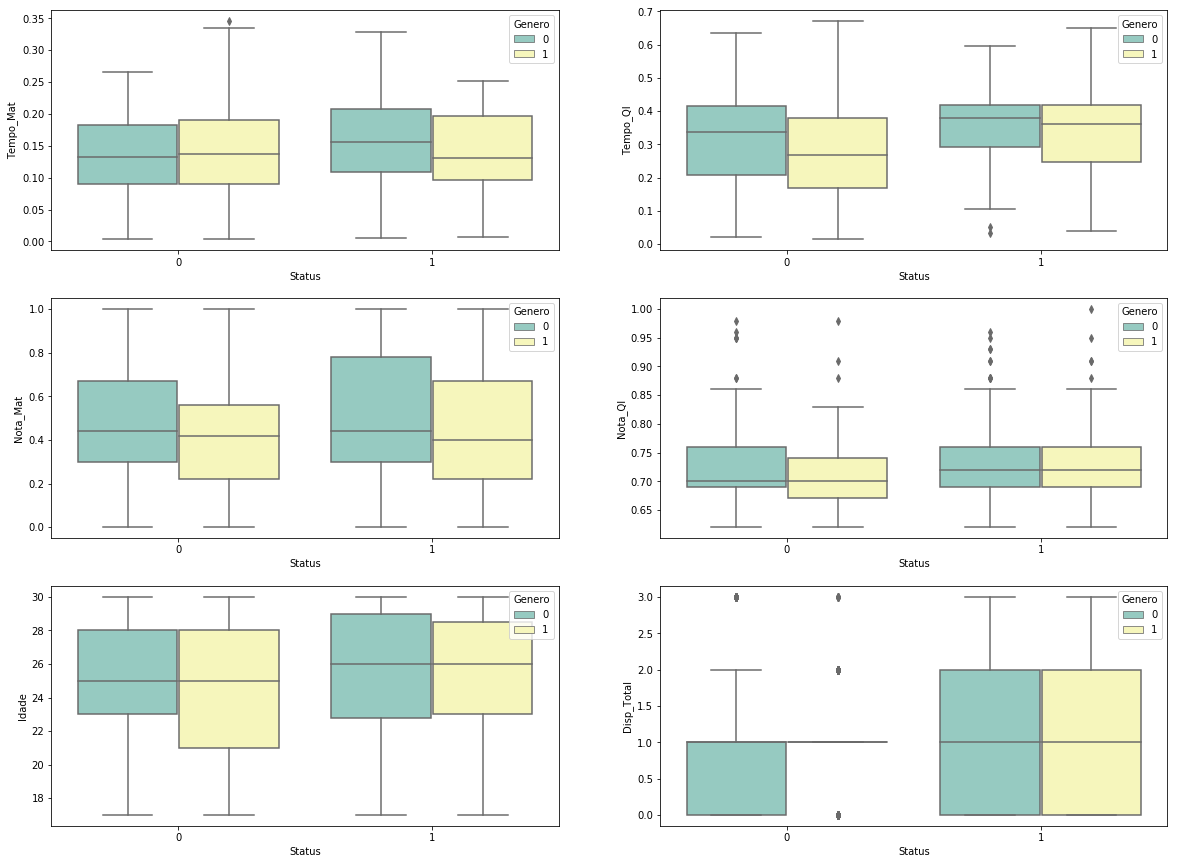

In [436]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 15)
sns.boxplot(x="Status", y="Tempo_Mat", hue="Genero",
                 data=df, palette="Set3", ax=axes[0][0]).set_xticklabels(axes[0][0].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Tempo_QI", hue="Genero",
                 data=df, palette="Set3", ax=axes[0][1]).set_xticklabels(axes[0][1].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Nota_Mat", hue="Genero",
                 data=df, palette="Set3", ax=axes[1][0]).set_xticklabels(axes[1][0].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Nota_QI", hue="Genero",
                 data=df[df['Nota_QI']!=0], palette="Set3", ax=axes[1][1]).set_xticklabels(axes[1][1].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Idade", hue="Genero",
                 data=df, palette="Set3", ax=axes[2][0]).set_xticklabels(axes[2][0].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Disp_Total", hue="Genero",
                 data=df, palette="Set3", ax=axes[2][1]).set_xticklabels(axes[2][1].get_xticklabels(), rotation=0)

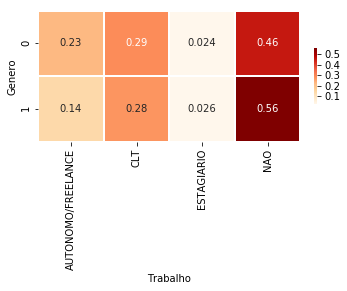

In [437]:
pivot = (df
            .groupby('Trabalho')
            .filter(lambda x : len(x) > 0)
            .groupby(['Genero','Trabalho'])
            .size()
            .unstack()
           )

pivot=pivot.div(pivot.sum(axis=1), axis=0)

plt.figure(figsize=(5,5))
g = sns.heatmap(
    pivot, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1, # space between cells
    annot = True
)

## Diferenças por cidade

[Text(0, 0, 'SAO PAULO'),
 Text(0, 0, 'Menos que 5 candidatos'),
 Text(0, 0, 'Grupo 2'),
 Text(0, 0, 'Grupo 1')]

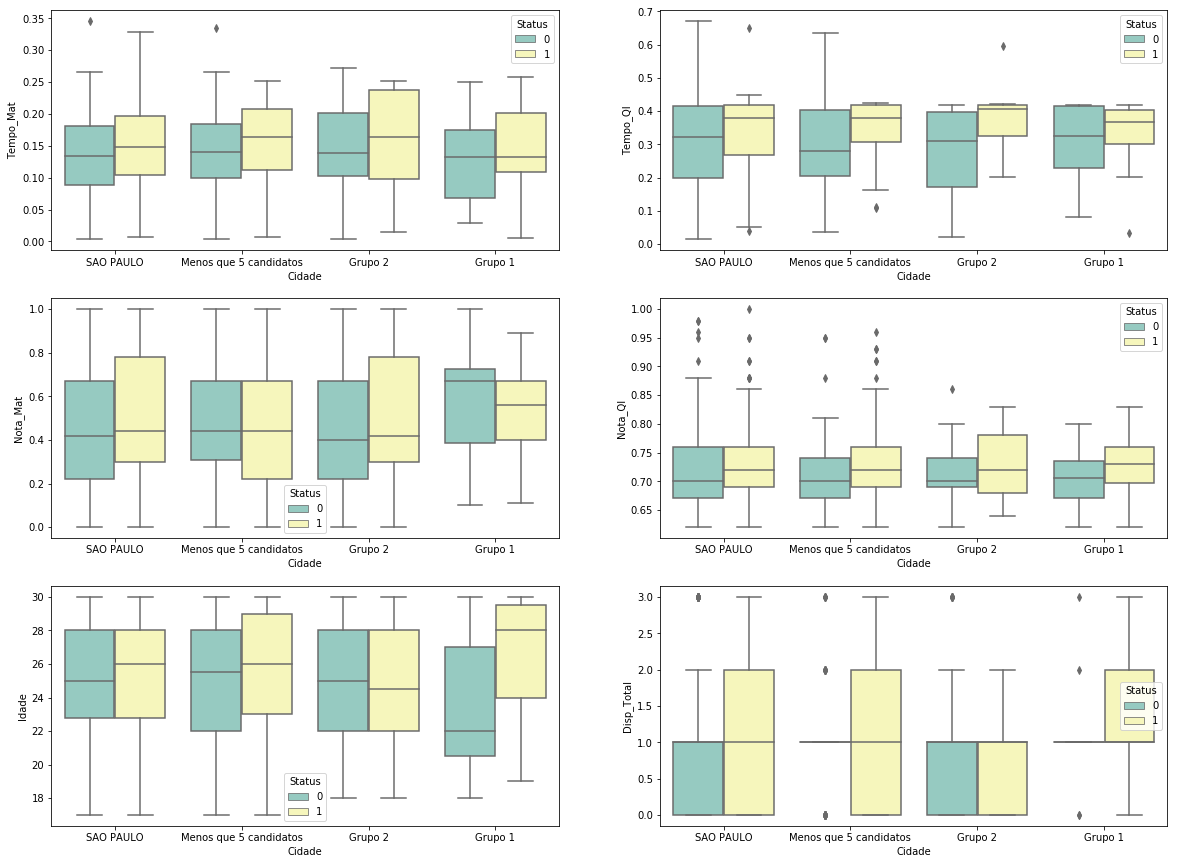

In [438]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 15)
sns.boxplot(x="Cidade", y="Tempo_Mat", hue="Status",
                 data=df, palette="Set3", ax=axes[0][0]).set_xticklabels(axes[0][0].get_xticklabels(), rotation=0)
sns.boxplot(x="Cidade", y="Tempo_QI", hue="Status",
                 data=df, palette="Set3", ax=axes[0][1]).set_xticklabels(axes[0][1].get_xticklabels(), rotation=0)
sns.boxplot(x="Cidade", y="Nota_Mat", hue="Status",
                 data=df, palette="Set3", ax=axes[1][0]).set_xticklabels(axes[1][0].get_xticklabels(), rotation=0)
sns.boxplot(x="Cidade", y="Nota_QI", hue="Status",
                 data=df[df['Nota_QI']!=0], palette="Set3", ax=axes[1][1]).set_xticklabels(axes[1][1].get_xticklabels(), rotation=0)
sns.boxplot(x="Cidade", y="Idade", hue="Status",
                 data=df, palette="Set3", ax=axes[2][0]).set_xticklabels(axes[2][0].get_xticklabels(), rotation=0)
sns.boxplot(x="Cidade", y="Disp_Total", hue="Status",
                 data=df, palette="Set3", ax=axes[2][1]).set_xticklabels(axes[2][1].get_xticklabels(), rotation=0)

## Motivação versus Condições

In [439]:
df['Motivacao'] = np.where(df['Objetivo'].isin(['QUERO APRENDER ALGO']), 1, 0) \
+ np.where(df['Conhecia_ramo'].isin(['SIM, JA QUERIA','NAN']), 0, 1)

df['Condicoes'] = np.where(df['Computador']=='NAO', 1, 0) \
+ np.where(df['Sustento']=='NAO SEI', 1, 0) \
+ np.where(df['Cidade']=='Grupo 2', 1, 0)

df['Score_Total']=df['Motivacao']+df['Condicoes']


In [440]:
df[['Motivacao','Condicoes','Score_Total']].describe()

,Motivacao,Condicoes,Score_Total
count,851.000000,851.000000,851.000000
mean,0.726204,0.401880,1.128085
std,0.512440,0.604451,0.839495
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000
75%,1.000000,1.000000,2.000000
max,2.000000,3.000000,4.000000


In [441]:
df.loc[df['Score_Total'].astype(int)==0,'Score'] = 0
df.loc[df['Score_Total'].astype(int)==1,'Score'] = 1
df.loc[df['Score_Total'].astype(int)>=2,'Score'] = '>=2'

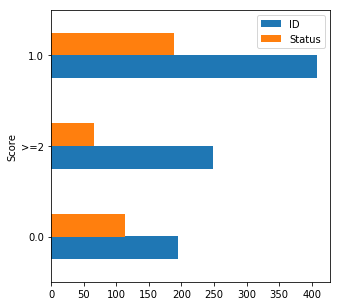

In [442]:
grouped = df[['ID','Score','Status']].groupby('Score', sort=True).agg({'ID': 'count','Status':'sum'})
grouped.sort_values(by='ID').tail(10).plot.barh()

[Text(0, 0, '0'), Text(0, 0, '1')]

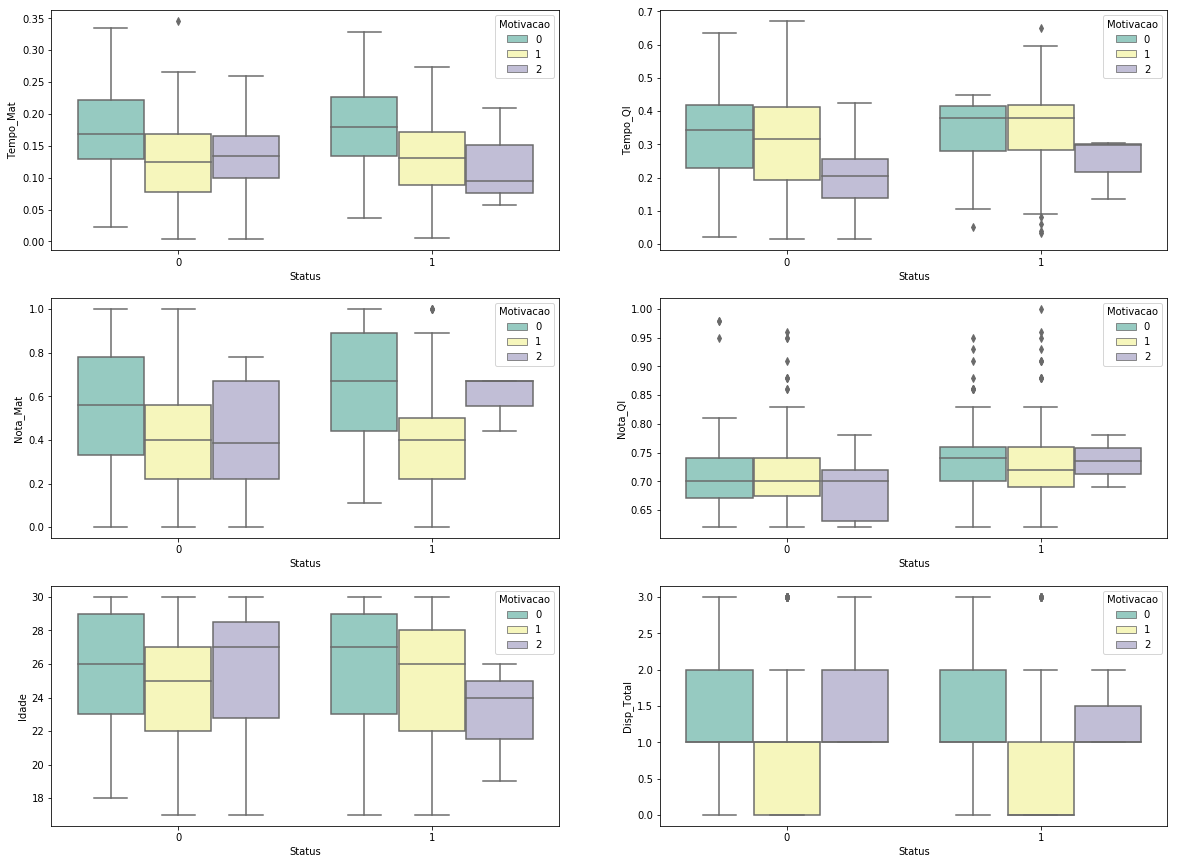

In [443]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 15)
sns.boxplot(x="Status", y="Tempo_Mat", hue="Motivacao",
                 data=df, palette="Set3", ax=axes[0][0]).set_xticklabels(axes[0][0].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Tempo_QI", hue="Motivacao",
                 data=df, palette="Set3", ax=axes[0][1]).set_xticklabels(axes[0][1].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Nota_Mat", hue="Motivacao",
                 data=df, palette="Set3", ax=axes[1][0]).set_xticklabels(axes[1][0].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Nota_QI", hue="Motivacao",
                 data=df[df['Nota_QI']!=0], palette="Set3", ax=axes[1][1]).set_xticklabels(axes[1][1].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Idade", hue="Motivacao",
                 data=df, palette="Set3", ax=axes[2][0]).set_xticklabels(axes[2][0].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Disp_Total", hue="Motivacao",
                 data=df, palette="Set3", ax=axes[2][1]).set_xticklabels(axes[2][1].get_xticklabels(), rotation=0)

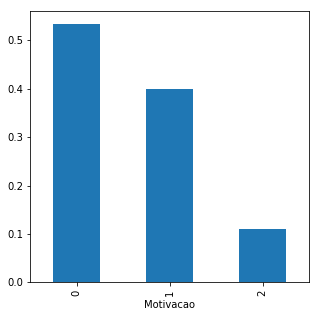

In [444]:
grouped =df[['Motivacao','Status','ID']].groupby('Motivacao', sort=True).agg({'Status':'mean','ID':'count'})
grouped['Status'].tail(10).plot.bar()
#sns.barplot(x='Motivacao',y='Status',data=grouped)

[Text(0, 0, '0'), Text(0, 0, '1')]

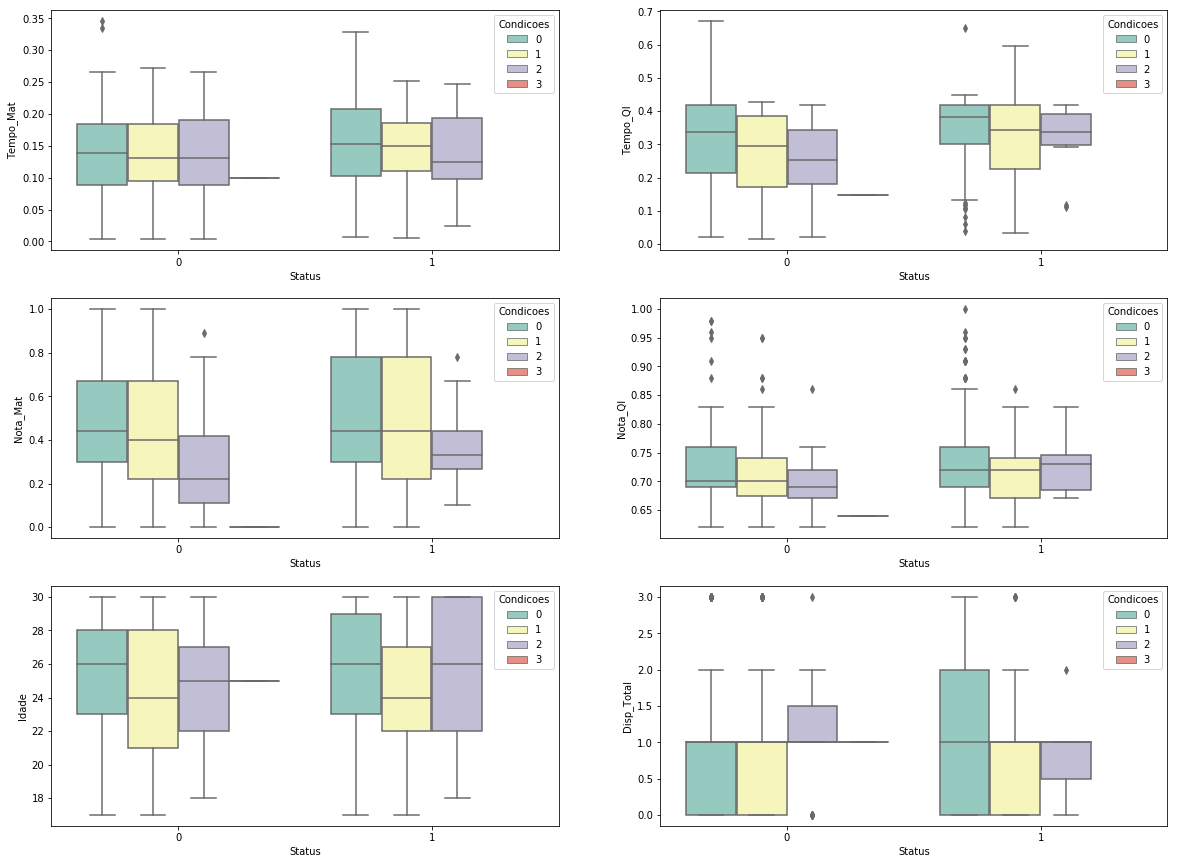

In [445]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 15)
sns.boxplot(x="Status", y="Tempo_Mat", hue="Condicoes",
                 data=df, palette="Set3", ax=axes[0][0]).set_xticklabels(axes[0][0].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Tempo_QI", hue="Condicoes",
                 data=df, palette="Set3", ax=axes[0][1]).set_xticklabels(axes[0][1].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Nota_Mat", hue="Condicoes",
                 data=df, palette="Set3", ax=axes[1][0]).set_xticklabels(axes[1][0].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Nota_QI", hue="Condicoes",
                 data=df[df['Nota_QI']!=0], palette="Set3", ax=axes[1][1]).set_xticklabels(axes[1][1].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Idade", hue="Condicoes",
                 data=df, palette="Set3", ax=axes[2][0]).set_xticklabels(axes[2][0].get_xticklabels(), rotation=0)
sns.boxplot(x="Status", y="Disp_Total", hue="Condicoes",
                 data=df, palette="Set3", ax=axes[2][1]).set_xticklabels(axes[2][1].get_xticklabels(), rotation=0)

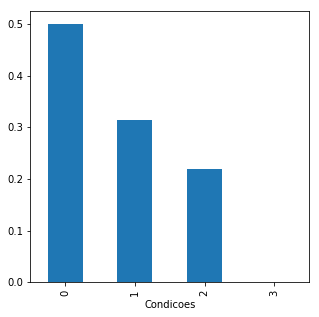

In [446]:
grouped =df[['Condicoes','Status','ID']].groupby('Condicoes', sort=True).agg({'Status':'mean','ID':'count'})
grouped['Status'].tail(10).plot.bar()

## Score total

Text(0, 0.5, 'counts')

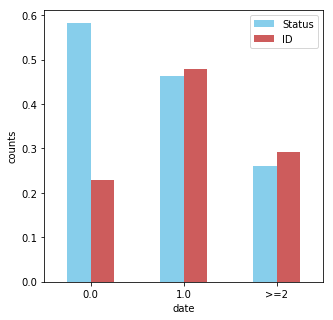

In [447]:
grouped =df[['Score','Status','ID']].groupby('Score', sort=True).agg({'Status':'mean','ID':'count'})

grouped['ID']=grouped['ID'].div(grouped['ID'].sum(axis=0), axis=0)
#grouped['ID'].plot.bar()
#grouped['Status'].plot.bar(secondary_y=True, )

ax = grouped.plot.bar(color=["SkyBlue","IndianRed"], rot=0, grid=False, )
ax.set_xlabel("date")
ax.set_ylabel("counts")

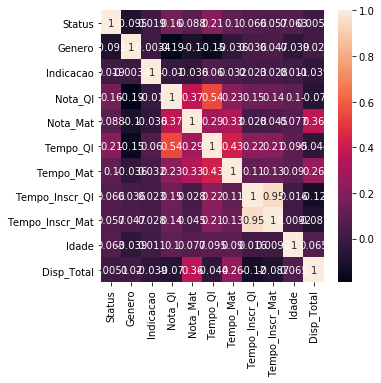

In [448]:
corrMatrix = df[['Status','Genero','Indicacao','Nota_QI','Nota_Mat','Tempo_QI','Tempo_Mat','Tempo_Inscr_QI','Tempo_Inscr_Mat','Idade','Disp_Total']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (10,7)
plt.show()

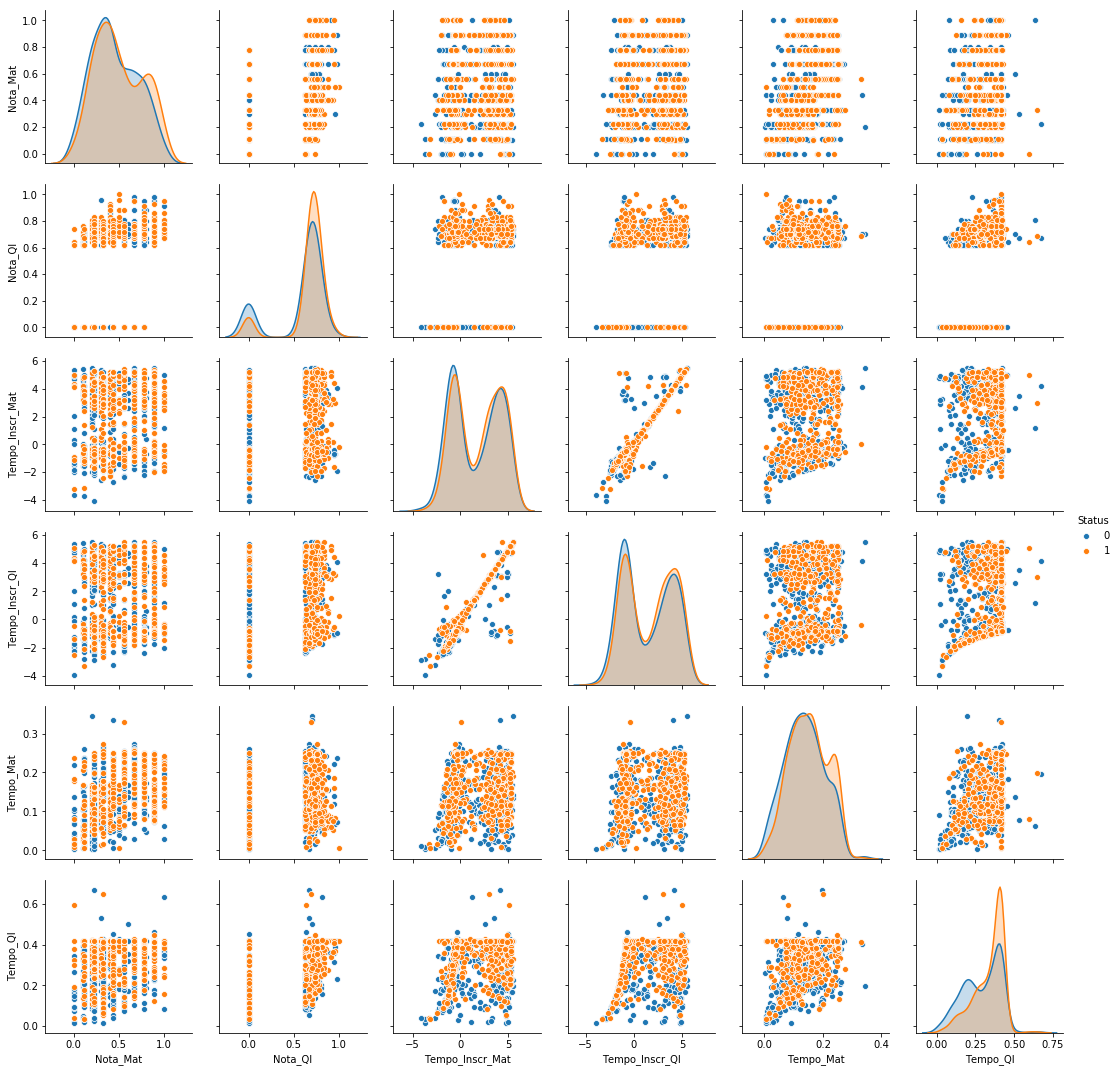

In [449]:
columns=['Nota_Mat','Nota_QI','Tempo_Inscr_Mat','Tempo_Inscr_QI','Tempo_Mat','Tempo_QI']
sns.pairplot(df, x_vars=columns,y_vars=columns, hue='Status')

[Text(784.7272727272725, 0.5, 'Status'), Text(0.5, 42.0, 'Não Compareceu')]

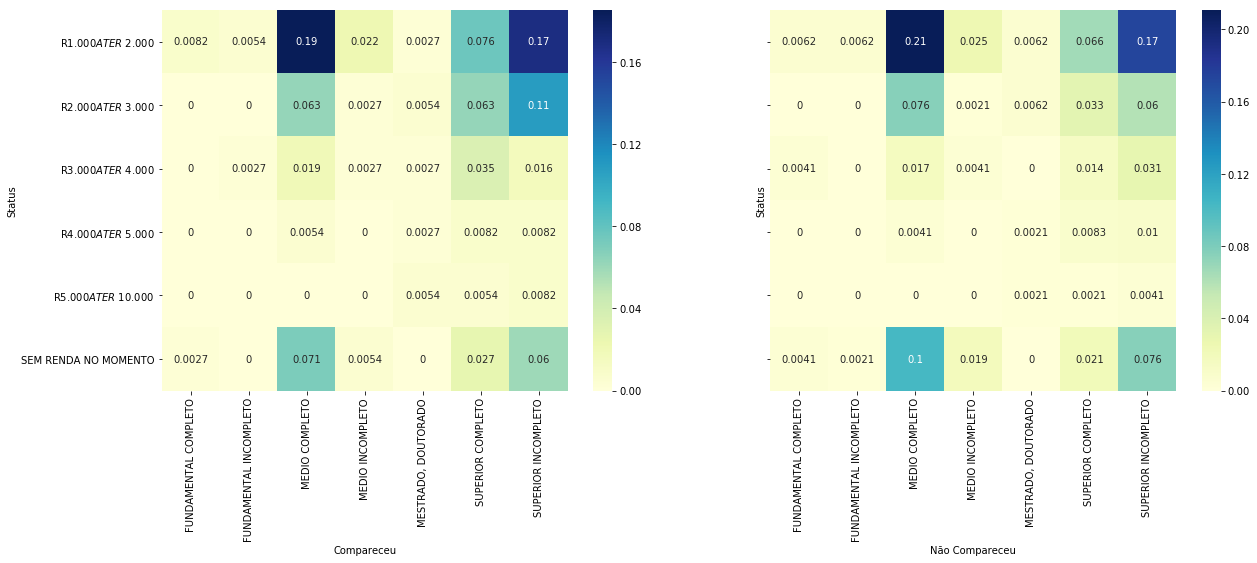

In [450]:
dados_comp=pd.crosstab(df[df['Status']==1].Renda, df[df['Status']==1].Educacao)/df[df['Status']==1].shape[0]
dados_n_comp=pd.crosstab(df[df['Status']==0].Renda, df[df['Status']==0].Educacao)/df[df['Status']==0].shape[0]

fig,(ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(20, 7)
sns.heatmap( dados_comp, cmap="YlGnBu",annot=True,ax=ax1) 
sns.heatmap( dados_n_comp, cmap="YlGnBu",annot=True,ax=ax2) 

ax1.set(xlabel='Compareceu', ylabel='Status')
ax2.set(xlabel='Não Compareceu', ylabel='Status')


In [451]:
data = df.drop(columns=['ID','Nome','Data_nasc','Disponibilidade','Disponibilidade','Como_conheceu','Objetivo','Conhecia_ramo','Disp_Manha','Disp_Tarde','Disp_Noite'])
#['ID','Nome','Data_nasc','Disponibilidade','Disponibilidade','Como_conheceu','Objetivo','Conhecia_ramo','Disp_Manha','Disp_Tarde','Disp_Noite']
data=data[data['Turma']!=1]
data=data[data['Nota_QI']!=0]

ignore_list=[]
exp_clf = setup(data, target = 'Status',
                numeric_features = ['Idade','Disp_Total'],
                categorical_features=['Motivacao','Condicoes','Score','Score_Total'],ignore_features=ignore_list)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2586
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(724, 24)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,14
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [452]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.5831,0.6078,0.4123,0.5654,0.4761,0.1439
1,Logistic Regression,0.5793,0.5881,0.5029,0.5612,0.5219,0.1494
2,CatBoost Classifier,0.5775,0.6255,0.5076,0.5474,0.5237,0.1457
3,Naive Bayes,0.5752,0.6042,0.5993,0.512,0.5456,0.1535
4,Linear Discriminant Analysis,0.5713,0.5893,0.5112,0.5462,0.5234,0.1352
5,Extreme Gradient Boosting,0.5713,0.6104,0.537,0.5333,0.5319,0.1375
6,Gradient Boosting Classifier,0.5711,0.6067,0.5069,0.5404,0.5175,0.1337
7,Extra Trees Classifier,0.5711,0.5668,0.5201,0.5544,0.5275,0.1361
8,Ridge Classifier,0.5694,0,0.5069,0.5508,0.5205,0.1314
9,Light Gradient Boosting Machine,0.5555,0.582,0.4764,0.522,0.4953,0.1003


In [453]:
qda = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6471,0.6770,0.6087,0.6087,0.6087,0.2873
1,0.4902,0.5280,0.4348,0.4348,0.4348,-0.0295
2,0.5686,0.5877,0.5652,0.5200,0.5417,0.1356
3,0.6078,0.6790,0.5833,0.5833,0.5833,0.2130
4,0.5098,0.6034,0.2917,0.4667,0.3590,-0.0047
5,0.5098,0.5633,0.6250,0.4839,0.5455,0.0319
6,0.6000,0.6167,0.5652,0.5652,0.5652,0.1948
7,0.7000,0.7069,0.6957,0.6667,0.6809,0.3981
8,0.5600,0.6167,0.4783,0.5238,0.5000,0.1086
9,0.5200,0.5250,0.5217,0.4800,0.5000,0.0400


In [454]:
interpret_model(qda,plot = 'reason', observation = 5)

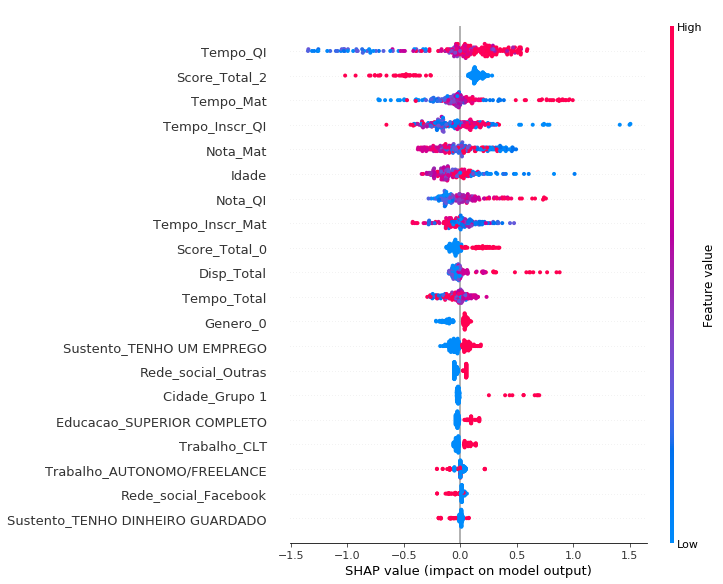

In [455]:
interpret_model(qda)

In [456]:
df.to_csv('data_processed.csv')
